In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
from pathlib import Path
from tqdm import tqdm

sys.path.insert(0, str(Path().absolute().parent))
from cv_prince.chap_07_complex_densities.gmm import GaussParams, GMMSampler, ExpectationMaximisationGMM

In [2]:
def rotation_mtx_from_angle(theta: float) -> np.ndarray:
    theta_rad = np.deg2rad(theta)
    cos_theta = np.cos(theta_rad)
    sin_theta = np.sin(theta_rad)

    return np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])

def create_cov_based_on_angle_and_axis_scale(
    angle: float, scale: tuple[float, float]
) -> np.ndarray:
    rot_mtx = rotation_mtx_from_angle(angle)
    scale_mtx = np.diag(scale)

    return rot_mtx @ scale_mtx @ np.linalg.inv(rot_mtx)

In [3]:
# GMM Component 1
mean_1 = (1.0, 4.0)
cov_1 = create_cov_based_on_angle_and_axis_scale(30, (1, 1/8))
gauss_params_1 = GaussParams(mean=mean_1, cov=cov_1)

# GMM Component 2
mean_2 = (2.0, 2.0)
cov_2 = create_cov_based_on_angle_and_axis_scale(0, (0.5, 0.5))
gauss_params_2 = GaussParams(mean=mean_2, cov=cov_2)

# GMM Component 3
mean_3 = (4.0, 3.0)
cov_3 = create_cov_based_on_angle_and_axis_scale(-60, (1, 1/4))
gauss_params_3 = GaussParams(mean=mean_3, cov=cov_3)

# GMM
weights = [0.6, 0.3, 0.1]
gaussians_params = [gauss_params_1, gauss_params_2, gauss_params_3]
gmm_sampler = GMMSampler(gaussians_params=gaussians_params, weights=weights)

gmm_samples = gmm_sampler.sample_points(n=10000, seed=12345)

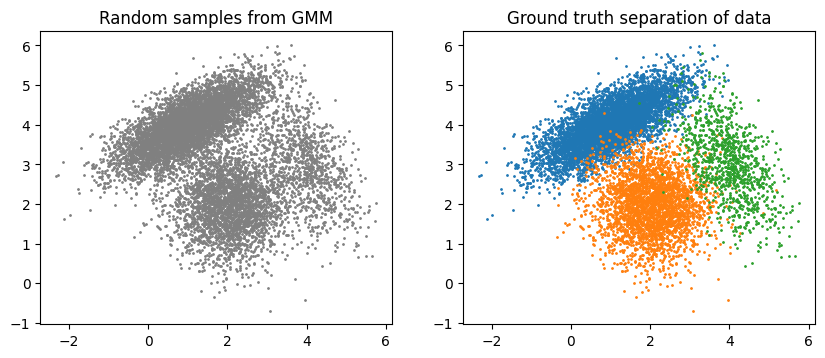

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for component_samples in gmm_samples:
    axes[0].scatter(component_samples[:, 0], component_samples[:, 1], s=1, color="gray")
    axes[1].scatter(component_samples[:, 0], component_samples[:, 1], s=1)

axes[0].set_title("Random samples from GMM")
axes[1].set_title("Ground truth separation of data")
for ax in axes:
    ax.set_aspect("equal")

In [5]:
all_samples = np.concatenate(gmm_samples)

em_fitter = ExpectationMaximisationGMM(num_components=3, seed=12345)
em_fitter.fit(all_samples)
print(em_fitter)

  8%|▊         | 83/1000 [00:00<00:04, 196.57it/s]

GMM with the following parameters 
* weights: 
[0.599 0.305 0.096] 

* means  : 
[[0.985 3.997]
 [2.039 1.997]
 [4.008 3.031]] 

* covs   : 
[[[ 0.761  0.374]
  [ 0.374  0.349]]

 [[ 0.505 -0.004]
  [-0.004  0.513]]

 [[ 0.398 -0.322]
  [-0.322  0.854]]]


In [6]:
predicted_category = em_fitter.predict(all_samples)

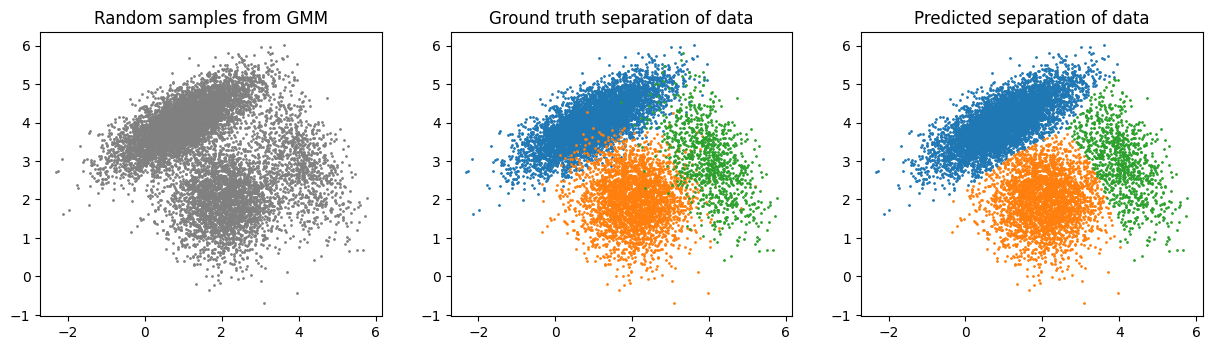

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(em_fitter.num_components):
    axes[0].scatter(gmm_samples[i][:, 0], gmm_samples[i][:, 1], s=1, color="gray")
    axes[1].scatter(gmm_samples[i][:, 0], gmm_samples[i][:, 1], s=1)

    predicted_i = predicted_category == i
    axes[2].scatter(all_samples[predicted_i, 0], all_samples[predicted_i, 1], s=1)

axes[0].set_title("Random samples from GMM")
axes[1].set_title("Ground truth separation of data")
axes[2].set_title("Predicted separation of data")
for ax in axes:
    ax.set_aspect("equal")